In [25]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_log_error
import math
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, cross_val_score,cross_validate,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score,precision_score,recall_score
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
def print_info(variable_name):
    print("---", variable_name, "     type = ", type(eval(variable_name)), "     Value = ", eval(variable_name)," --- ")

def print_infos(*variable_names):
    """
        Prints information about the variables

        Example: print_infos('var1','var2')
    """
    for variable_name in variable_names:
        print("---", variable_name, "     type = ", type(eval(variable_name)), "     Value = ", eval(variable_name)," --- ")

def print_types(*variable_names,print_shape=True):
    """
        Prints types about the variables

        :param print_shape(bool): Prints shape of variables (Needs them to be a np array, DataFrame or Series)

        Example: print_types('var1','var2')
    """
    for variable_name in variable_names:
        if not print_shape:
            print("---", variable_name, "     type = ", type(eval(variable_name)))
        if print_shape:
            print("---", variable_name, "     type = ", type(eval(variable_name)),end="") #makes to to not have a new line
            try:
                print("     Shape = ", eval(variable_name).shape," --- \n")
            except:
                pass


In [ ]:
data=pd.read_pickle("./data/trainset.pkl")
if False:
    data.head(10000).to_excel("./data/trainset.xlsx")
data=data.drop(["index"],axis=1)

data['error'] = (data['error_category'] != 'NO_ERROR').astype(int)

In [ ]:
data2 = data.sample(frac = 1)

Look at DataFrame

In [ ]:
data.head()

,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5,20,32,0.85,-1.9,189.2,1,NO_ERROR
1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5,20,33,0.88,<NA>,189.5,1,NO_ERROR
2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5,20,34,0.92,-2.0,190.1,1,NO_ERROR
3,11,2020-01-01 00:30:00+00:00,0.525,0.2181,272.1,272.7,0.805369,0.676091,5,20,38,0.94,-2.0,190.0,1,NO_ERROR
4,11,2020-01-01 00:40:00+00:00,0.541667,0.2343,279.5,281.1,0.832215,0.700397,5,20,41,0.95,-2.0,189.9,1,NO_ERROR


In [7]:
print(data.shape)
print(data.info())


(1367190, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367190 entries, 0 to 1367189
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   turbine_id          1367190 non-null  Int64  
 1   measured_at         1367190 non-null  string 
 2   wind_speed          1266014 non-null  Float64
 3   power               1309054 non-null  Float64
 4   nacelle_direction   1367190 non-null  Float64
 5   wind_direction      1367190 non-null  Float64
 6   rotor_speed         1270268 non-null  Float64
 7   generator_speed     1268654 non-null  Float64
 8   temp_environment    1295786 non-null  Int64  
 9   temp_hydraulic_oil  1295632 non-null  Int64  
 10  temp_gear_bearing   1296615 non-null  Int64  
 11  cosphi              1367190 non-null  Float64
 12  blade_angle_avg     1179701 non-null  Float64
 13  hydraulic_pressure  1367190 non-null  Float64
 14  park_id             1367190 non-null  Int64  
 15  e

In [9]:
if False:
    data.describe()



In [10]:

action=2
match action:
    case 1:
       #print(data["error_category"].value_counts())
       print("Numbers of different values ", len(data["measured_at"].unique()))
    case 2: 
        print(data["error_category"].value_counts())
    case 3:
        print("---------")
        n=len(data["turbine_id"].unique())
        print("THere are", n," turbine_id categories: ")
        print(data["turbine_id"].unique())
        print("---------")
        n=len(data["error_category"].unique())
        print("THere are", n," error categories: ")
        print(data["error_category"].unique())

        print("---------")
        n=len(data["park_id"].unique())
        print("THere are", n," park_id categories: ")
        print(data["park_id"].unique())

        

      

NO_ERROR    1272609
ERROR=12      47724
ERROR=17      21651
ERROR=3       10224
ERROR=5        4893
ERROR=19       3743
ERROR=24       1771
ERROR=28       1494
ERROR=8        1081
ERROR=20        787
ERROR=31        495
ERROR=30        409
ERROR=22        141
ERROR=25        108
ERROR=7          32
ERROR=27         22
ERROR=29          4
ERROR=23          2
Name: error_category, dtype: Int64


In [37]:
temp1=data.isnull().sum()
print_info('temp1')
#print_info('temp1[temp1>0]')
features_with_nan=list(temp1[temp1>0].keys())
print_info('features_with_nan')

--- temp1      type =  <class 'pandas.core.series.Series'>      Value =  turbine_id                 0
measured_at                0
wind_speed            101176
power                  58136
nacelle_direction          0
wind_direction             0
rotor_speed            96922
generator_speed        98536
temp_environment       71404
temp_hydraulic_oil     71558
temp_gear_bearing      70575
cosphi                     0
blade_angle_avg       187489
hydraulic_pressure         0
park_id                    0
error_category             0
error                      0
dtype: int64  --- 
--- features_with_nan      type =  <class 'list'>      Value =  ['wind_speed', 'power', 'rotor_speed', 'generator_speed', 'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'blade_angle_avg']  --- 


First Exploration of individual features

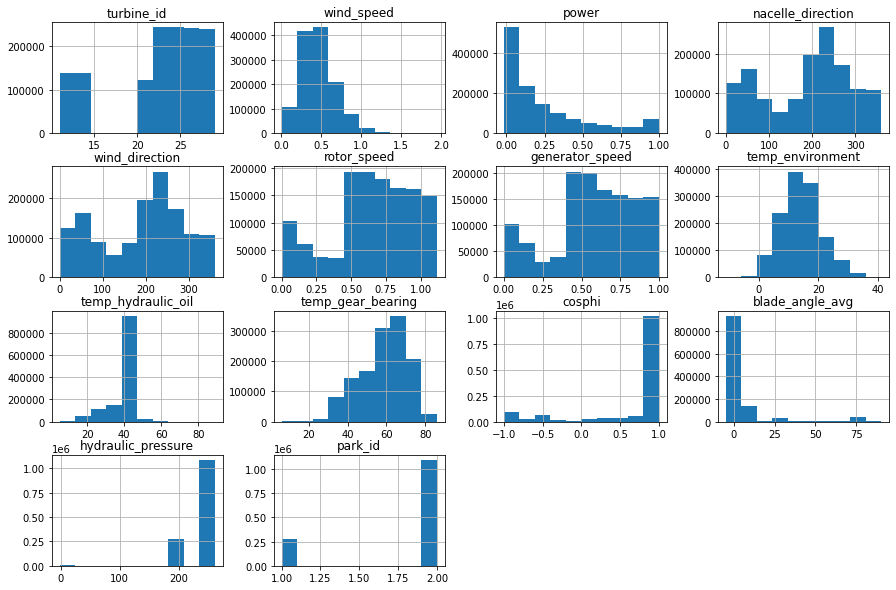

In [12]:
col_num=data.select_dtypes(exclude="object").columns

data[col_num].hist(figsize=(15,10))
plt.show()


In [23]:
scatter_matrix( data2.head(1000)[col_num],figsize=(30,30))
plt.show()

KeyError: "['error'] not in index"

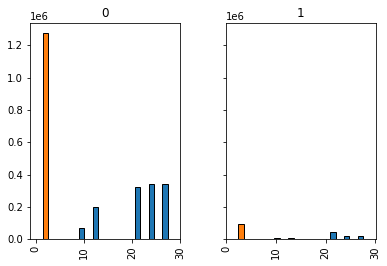

In [22]:
col_num=list(data.select_dtypes(exclude="object").columns)
column=col_num[0]
hist = data[[column,'error']].hist(by='error', bins=10, ec='black', sharey=True)

In [55]:
#data.groupby("park_id").turbine_id.mean()
data.groupby("park_id").turbine_id.value_counts() #how much data for each turbine

park_id  turbine_id
1        13             69703
         14             69691
         11             69613
         12             69605
2        24            121509
         23            121508
         22            121495
         25            121493
         27            121454
         21            121308
         26            121146
         29            120979
         28            117686
Name: turbine_id, dtype: int64